## Data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', header=0)

In [3]:
df.head()

gpu          gemm input mode     m     n     k  \
NVIDIA_GH200_120GB D  normal01   fp64_int8_3     N    N  1024  1024  1024   
                   D  normal01   fp64_int8_9     N    N  1024  1024  1024   
                   D  normal01  fp64_int8_18     N    N  1024  1024  1024   
                   D  normal01         dgemm     N    N  1024  1024  1024   
                   D  normal01   fp64_int8_3     N    N  2048  2048  2048   

                          residual  max_relative  throughput_in_tflops  
NVIDIA_GH200_120GB D  2.401237e-05  2.757648e+01             15.468640  
                   D  2.275485e-16  5.395420e-12              3.109284  
                   D  2.275303e-16  1.286471e-15              0.876498  
                   D  1.066552e-15  9.625805e-10             52.867900  
                   D  2.717785e-05  3.946706e+01             37.601840

In [4]:
df['slices'] = df['gemm'].str.extract(r'fp64_int8_(\d+)').astype(float)
df.loc[df['gemm'] == 'dgemm', 'slices'] = 0

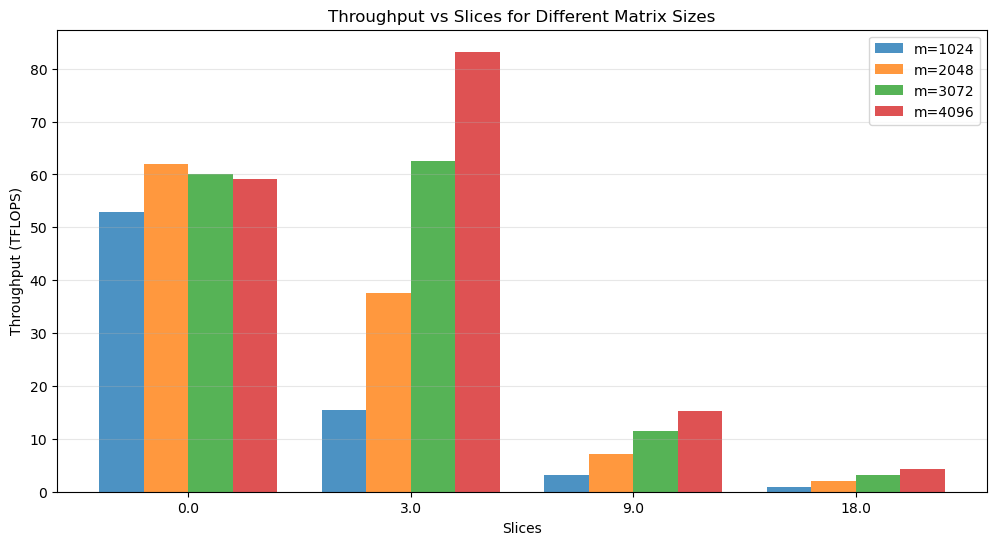

In [5]:
# Get unique matrix sizes (m values)
m_values = df['m'].unique()

# Get unique slice values (excluding NaN)
slice_values = df['slices'].dropna().unique()
slice_values = sorted(slice_values)

plt.figure(figsize=(12, 6))

width = 0.8 / len(m_values)  # Adjust width based on number of m values
x_pos = range(len(slice_values))

# Plot a bar for each m value
for i, m_val in enumerate(m_values):
    df_m = df[df['m'] == m_val].dropna(subset=['slices'])
    
    # Sort by slices to match x_pos
    df_m = df_m.sort_values('slices')
    
    offset = (i - len(m_values)/2 + 0.5) * width
    plt.bar([p + offset for p in x_pos], 
            df_m['throughput_in_tflops'], 
            width, 
            label=f'm={m_val}', 
            alpha=0.8)

plt.xlabel('Slices')
plt.ylabel('Throughput (TFLOPS)')
plt.title('Throughput vs Slices for Different Matrix Sizes')
plt.xticks(x_pos, slice_values)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

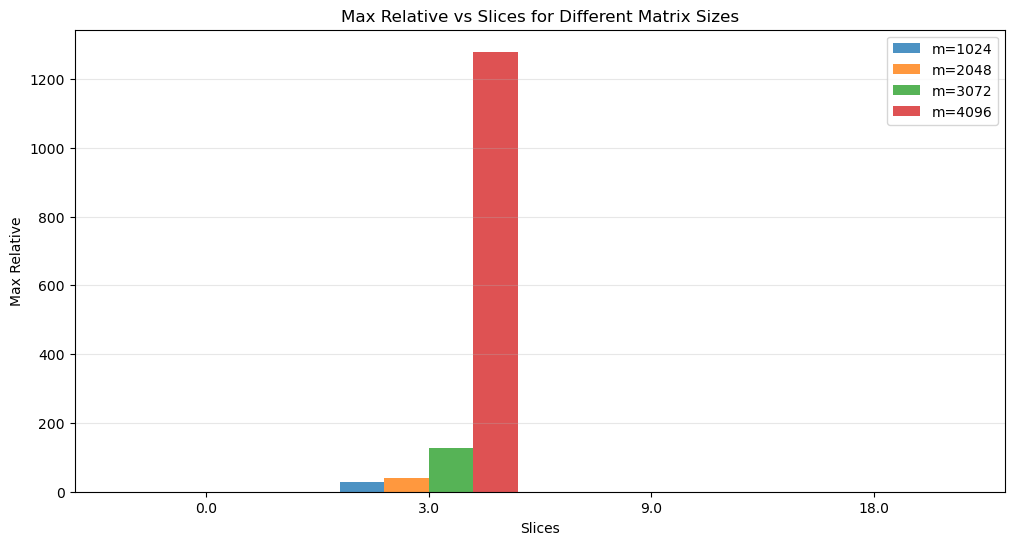

In [6]:
plt.figure(figsize=(12, 6))

width = 0.8 / len(m_values)  # Adjust width based on number of m values
x_pos = range(len(slice_values))

# Plot a bar for each m value
for i, m_val in enumerate(m_values):
    df_m = df[df['m'] == m_val].dropna(subset=['slices'])
    
    # Sort by slices to match x_pos
    df_m = df_m.sort_values('slices')
    
    offset = (i - len(m_values)/2 + 0.5) * width
    plt.bar([p + offset for p in x_pos], 
            df_m['max_relative'], 
            width, 
            label=f'm={m_val}', 
            alpha=0.8)

plt.xlabel('Slices')
plt.ylabel('Max Relative')
plt.title('Max Relative vs Slices for Different Matrix Sizes')
plt.xticks(x_pos, slice_values)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

## Power testing   

In [14]:
df_power = pd.read_csv('power.csv', header=0)

In [15]:
df_power.head()

,gpu,mode,m,n,k,throughput_in_tflops,avg_watt,gflops_per_watt,time,count
0,NVIDIA_GH200_120GB,fp64_int8_9,2048,2048,2048,7.025948,540.0313,13.01026,10.00088,4090
1,NVIDIA_GH200_120GB,dgemm,2048,2048,2048,56.399050,853.9366,66.04595,10.00044,32830
2,NVIDIA_GH200_120GB,fp64_int8_9,16384,16384,16384,24.432310,819.2324,29.82342,10.80056,30
3,NVIDIA_GH200_120GB,dgemm,16384,16384,16384,56.484230,889.4968,63.50133,10.90086,70
